In [0]:
# Import required Libraries
!pip install fastparquet
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime

     |████████████████████████████████| 153kB 4.6MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
  Created wheel for fastparquet: filename=fastparquet-0.3.3-cp36-cp36m-linux_x86_64.whl size=253683 sha256=b1411220f22b288101370e0d3fa696c0d3b9721cf26548f40316ec80cdb47e46
  Stored in directory: /root/.cache/pip/wheels/a0/27/9f/d8066bbbbb77e97d8ad3daf4de155ead73693bc4aa2f52098c
  Created wheel for thrift: filename=thrift-0.13.0-cp36-cp36m-linux_x86_64.whl size=345245 sha256=980f3efed7be687289ef64c7b6d1475d6869f6c7df319a7c34e98c1da5a6ee79
  Stored in directory: /root/.cache/pip/wheels/02/a2/46/689ccfcf40155c23edc7cdbd9de488611c8fdf49ff34b1706e
Successfully built fastparquet thrift


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
stocks = pd.read_parquet('https://github.com/ddkpham/Stock_Prediction_NLP_ML/blob/master/wsb.hourly.joined.parquet.gz?raw=true', engine="fastparquet")

In [0]:
stocks = stocks.set_index('created_utc')
stocks.head(15)

,score,gilded,wordcount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,AAPL_StockPrice,AMZN_StockPrice,BA_StockPrice,SPY_StockPrice,TSLA_StockPrice
created_utc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03 00:00:00,10.600000,0.0,15.127273,-0.004773,0.096914,-0.028997,-0.013654,-0.040472,-0.028197,0.125876,-0.090572,-0.019698,0.014693,-0.054471,0.067811,-0.644199,-0.025561,0.057828,0.023972,0.050608,-0.039287,-0.005363,-0.008665,0.034497,0.012236,0.022241,0.046725,-0.052190,116.0100,757.7600,155.6800,224.8600,214.3000
2017-01-03 01:00:00,6.126761,0.0,14.957746,-0.018255,0.086793,-0.015693,-0.014463,-0.047337,-0.039189,0.151025,-0.093762,-0.020432,-0.019548,-0.048424,0.071786,-0.654657,-0.027213,0.051639,0.025399,0.043440,-0.030382,0.008667,-0.015632,0.004107,0.018103,0.037762,0.030239,-0.058607,116.0100,757.7600,155.6800,224.8600,214.3000
2017-01-03 02:00:00,5.150685,0.0,18.753425,-0.013361,0.085355,-0.045373,-0.029794,-0.013735,-0.030920,0.150325,-0.091344,-0.026739,-0.009032,-0.041135,0.067349,-0.664607,-0.017916,0.042718,0.020656,0.046754,-0.034045,0.017639,-0.018602,-0.003617,0.002007,0.037377,0.017159,-0.064736,116.0100,757.7600,155.6800,224.8600,214.3000
2017-01-03 03:00:00,5.723404,0.0,16.893617,-0.008933,0.079429,-0.009839,-0.026562,-0.041718,-0.015318,0.154539,-0.070138,-0.004626,-0.014793,-0.042021,0.050639,-0.704387,-0.025392,0.044839,0.022422,0.037292,-0.049528,-0.016045,-0.011871,-0.007581,0.005232,0.022578,0.016312,-0.054883,116.0100,757.7600,155.6800,224.8600,214.3000
2017-01-03 04:00:00,1.516667,0.0,19.700000,-0.015290,0.079454,-0.002097,-0.019933,-0.023108,-0.015315,0.154939,-0.103260,-0.012407,-0.019405,-0.025600,0.063360,-0.689079,-0.015129,0.049656,0.007581,0.052487,-0.042734,0.003075,-0.006144,-0.011684,0.011437,0.028106,0.017372,-0.061380,116.0100,757.7600,155.6800,224.8600,214.3000
2017-01-03 05:00:00,3.255814,0.0,15.976744,-0.014781,0.085741,-0.026385,-0.003864,-0.051092,-0.033141,0.143657,-0.059111,-0.027359,-0.020514,-0.042679,0.038665,-0.696117,-0.037149,0.035119,0.037384,0.048322,-0.046504,-0.005585,-0.039539,0.028856,0.042020,0.024729,0.045482,-0.048163,115.9100,758.0000,155.6800,224.9300,214.6000
2017-01-03 06:00:00,2.350000,0.0,25.300000,-0.010018,0.098739,-0.015197,-0.012734,-0.033750,-0.022207,0.143750,-0.097725,-0.039407,-0.006006,-0.059138,0.068249,-0.682646,-0.036659,0.031502,0.030103,0.041138,-0.044992,0.014180,-0.023408,0.028523,0.045922,0.051077,0.006941,-0.053054,116.1600,758.2700,155.6800,225.2200,215.0700
2017-01-03 07:00:00,4.700000,0.0,13.600000,-0.003744,0.070836,-0.027450,-0.010439,-0.027748,-0.038782,0.159894,-0.084562,-0.009657,-0.045888,-0.063967,0.046034,-0.692935,-0.032649,0.041157,0.028699,0.037577,-0.043378,0.017299,-0.012651,0.021993,0.011901,0.015569,0.047279,-0.076140,116.1000,759.5200,155.6800,225.1600,215.7000
2017-01-03 08:00:00,2.368421,0.0,27.105263,-0.006617,0.067709,-0.021958,-0.029586,-0.047045,-0.021687,0.155813,-0.097508,-0.013550,-0.005309,-0.020379,0.058276,-0.725197,-0.008400,0.026572,0.021742,0.051936,-0.050359,0.004710,-0.035732,0.004942,0.008583,0.010172,0.002730,-0.048584,116.2000,757.4000,155.6800,225.0000,215.4600


In [0]:
dataset = stocks.values
dataset

array([[1.06000000e+01, 0.00000000e+00, 1.51272727e+01, ...,
        1.55680000e+02, 2.24860000e+02, 2.14300000e+02],
       [6.12676056e+00, 0.00000000e+00, 1.49577465e+01, ...,
        1.55680000e+02, 2.24860000e+02, 2.14300000e+02],
       [5.15068493e+00, 0.00000000e+00, 1.87534247e+01, ...,
        1.55680000e+02, 2.24860000e+02, 2.14300000e+02],
       ...,
       [7.10147601e+00, 1.84501845e-03, 1.74298893e+01, ...,
        3.40090000e+02, 3.03330000e+02, 3.14600000e+02],
       [6.61122661e+00, 0.00000000e+00, 1.62993763e+01, ...,
        3.40090000e+02, 3.03330000e+02, 3.14600000e+02],
       [4.51340996e+00, 0.00000000e+00, 1.44923372e+01, ...,
        3.40090000e+02, 3.03330000e+02, 3.14600000e+02]])

In [0]:
price_data = stocks.filter(['AAPL_StockPrice', 'AMZN_StockPrice', 'BA_StockPrice', 'SPY_StockPrice', 'TSLA_StockPrice'])
price_dataset = price_data.values
price_dataset

array([[ 116.01,  757.76,  155.68,  224.86,  214.3 ],
       [ 116.01,  757.76,  155.68,  224.86,  214.3 ],
       [ 116.01,  757.76,  155.68,  224.86,  214.3 ],
       ...,
       [ 248.56, 1776.99,  340.09,  303.33,  314.6 ],
       [ 248.56, 1776.99,  340.09,  303.33,  314.6 ],
       [ 248.56, 1776.99,  340.09,  303.33,  314.6 ]])

In [0]:
# set training set len
training_data_len = math.ceil(len(dataset) * 0.8)

In [0]:
# Scale datasets 
scaler = MinMaxScaler(feature_range=(0,1))
price_scaler = MinMaxScaler(feature_range=(0,1))

scaled_dataset = scaler.fit_transform(dataset)
scaled_price_dataset = price_scaler.fit_transform(price_dataset)

In [0]:
# Split data into x_train, y_train 
train_features = scaled_dataset[0:training_data_len,:]
train_values = scaled_price_dataset[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_features)):
  x_train.append(train_features[i-60:i, :])
  y_train.append(train_values[i:i+1,:][0].tolist())
  if(i < 62):
    print(y_train)

[[0.010926312649164549, 0.021618826362464594, 0.010530677070745398, 0.02366032000455842, 0.21612732335951912]]
[[0.010926312649164549, 0.021618826362464594, 0.010530677070745398, 0.02366032000455842, 0.21612732335951912], [0.009396628878281632, 0.022344342134714368, 0.01102095777371126, 0.02477514582541085, 0.2183464545366125]]


In [0]:
# Convert both x, y training sets to np array 
x_train, y_train = np.array(x_train), np.array(y_train)
print(y_train, type(y_train))
# Reshape the data // LSTM network expects 3 dimensional input in the form of 
# (number of samples, number of timesteps, number of features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 33))
x_train.shape

[[0.01092631 0.02161883 0.01053068 0.02366032 0.21612732]
 [0.00939663 0.02234434 0.01102096 0.02477515 0.21834645]
 [0.00809218 0.02339402 0.01112143 0.02477515 0.22986752]
 ...
 [0.6389469  0.85028133 0.72240445 0.79611074 0.4676446 ]
 [0.6389469  0.85028133 0.72240445 0.79611074 0.4676446 ]
 [0.6389469  0.85028133 0.72240445 0.79611074 0.4676446 ]] <class 'numpy.ndarray'>


(13558, 60, 33)

In [0]:
# Declare the LSTM model architecture 
model = Sequential()

# Add layers , input shape expected is (number of timesteps, number of features)
model.add(LSTM(75, return_sequences=True, input_shape=(x_train.shape[1], 33)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(5))

In [0]:
# Compile Model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# Train the model 
model.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
848/848 [==============================] - 46s 55ms/step - loss: 0.0029
Epoch 2/100
848/848 [==============================] - 46s 55ms/step - loss: 3.2181e-04
Epoch 3/100
848/848 [==============================] - 47s 55ms/step - loss: 2.7411e-04
Epoch 4/100
848/848 [==============================] - 46s 54ms/step - loss: 2.2262e-04
Epoch 5/100
848/848 [==============================] - 46s 55ms/step - loss: 1.9440e-04
Epoch 6/100
848/848 [==============================] - 47s 55ms/step - loss: 1.6798e-04
Epoch 7/100
848/848 [==============================] - 47s 55ms/step - loss: 1.5693e-04
Epoch 8/100
848/848 [==============================] - 46s 55ms/step - loss: 1.4444e-04
Epoch 9/100
848/848 [==============================] - 46s 54ms/step - loss: 1.2453e-04
Epoch 10/100
848/848 [==============================] - 46s 54ms/step - loss: 1.1672e-04
Epoch 11/100
848/848 [==============================] - 45s 53ms/step - loss: 1.0994e-04
Epoch 12/100
848/848 [============

In [0]:
test_data = scaled_dataset[training_data_len-60:, :]
test_y = scaled_price_dataset[training_data_len-60:, :]

x_test = []
y_test = []

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, :])
  y_test.append(test_y[i:i+1,:][0].tolist())

In [0]:
# Convert the data into a np array
x_test = np.array(x_test)

# Reshape data into 3 dimensions ( num samples, timesteps, num features )
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 33))

In [0]:
# Get the models predicted price values 
predictions = model.predict(x_test)

# Inverse transform 
predictions = price_scaler.inverse_transform(predictions)


In [0]:
# Evaluate model with root mean square error (RMSE)
rmse = np.sqrt(np.mean((predictions-y_test)**2))
rmse

859.9832708900569

In [0]:
# Set up ploting dataset
# plotData = stocks.filter(['created_utc','AAPL_CPrc', 'AMZN_CPrc', 'BA_CPrc', 'SPY_CPrc', 'TSLA_CPrc'])
# plotData = plotData.set_index("created_utc")
# print(plotData, type(plotData))

# This is so it graphs nicely with dates 
AAPL = stocks["AAPL_StockPrice"]
AAPL = AAPL.to_frame()
AMZN = stocks["AMZN_StockPrice"]
AMZN = AMZN.to_frame()
BA = stocks["BA_StockPrice"]
BA = BA.to_frame();
SPY = stocks["SPY_StockPrice"]
SPY = SPY.to_frame();
TSLA = stocks["TSLA_StockPrice"]
TSLA = TSLA.to_frame()

appleTest = AAPL[0:training_data_len]
amazonTest = AMZN[0:training_data_len]
boeTest = BA[0:training_data_len]
spyTest = SPY[0: training_data_len]
teslaTest = TSLA[0: training_data_len]

appleValid = AAPL[training_data_len:]
amazonValid = AMZN[training_data_len:]
boeValid = BA[training_data_len:]
spyValid = SPY[training_data_len:]
teslaValid = TSLA[training_data_len:]
# print(appleValid)

appleValid['Predictions'] = predictions[:,:1]
amazonValid["Predictions"] = predictions[:,1:2]
boeValid['Predictions'] = predictions[:, 2:3]
spyValid["Predictions"] = predictions[:, 3:4]
teslaValid["Predictions"] = predictions[:, 4:5]
print(len(appleValid), len(predictions))

3404 3404


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

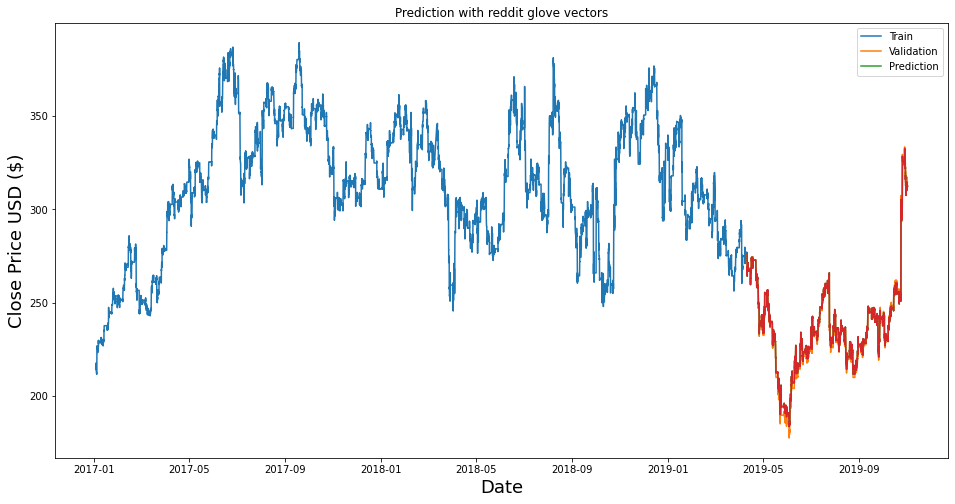

In [0]:
# Visualize data
plt.figure(figsize=(16,8))
plt.title('Prediction with reddit glove vectors')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(appleTest)
# plt.plot(appleValid)
# plt.plot(appleValid['Predictions'])
# plt.plot(amazonTest)
# plt.plot(amazonValid)
# plt.plot(amazonValid['Predictions'])
# plt.plot(boeTest)
# plt.plot(boeValid)
# plt.plot(boeValid['Predictions'])
# plt.plot(spyTest)
# plt.plot(spyValid)
# plt.plot(spyValid['Predictions'])
plt.plot(teslaTest)
plt.plot(teslaValid)
plt.plot(teslaValid['Predictions'])
plt.legend(['Train', 'Validation', 'Prediction'])
plt.show()

In [0]:
hourly_prices = stocks.filter(['AAPL_StockPrice', 'AMZN_StockPrice', 'BA_StockPrice', 
                               'SPY_StockPrice', 'TSLA_StockPrice'])
hourly_prices

,AAPL_StockPrice,AMZN_StockPrice,BA_StockPrice,SPY_StockPrice,TSLA_StockPrice
created_utc,,,,,
2017-01-03 00:00:00,116.01,757.76,155.68,224.86,214.3
2017-01-03 01:00:00,116.01,757.76,155.68,224.86,214.3
2017-01-03 02:00:00,116.01,757.76,155.68,224.86,214.3
2017-01-03 03:00:00,116.01,757.76,155.68,224.86,214.3
2017-01-03 04:00:00,116.01,757.76,155.68,224.86,214.3
...,...,...,...,...,...
2019-10-31 19:00:00,248.56,1776.99,340.09,303.20,314.6
2019-10-31 20:00:00,248.56,1776.99,340.09,303.33,314.6
2019-10-31 21:00:00,248.56,1776.99,340.09,303.33,314.6


In [0]:
hourly_dataset = hourly_prices.values

In [0]:
# set training set len
train_len = math.ceil(len(hourly_dataset) * 0.80) 

In [0]:
hourScaler = MinMaxScaler(feature_range=(0,1))
scaled_hourly_prices = hourScaler.fit_transform(hourly_dataset)

In [0]:
x_train_data = scaled_hourly_prices[0:train_len, :]

In [0]:
x_train2 = []
y_train2 = []

for i in range(60, len(x_train_data)):
  x_train2.append(x_train_data[i-60:i, :])
  y_train2.append(x_train_data[i:i+1, :][0].tolist())
print(y_train2)

[[0.010926312649164549, 0.021618826362464594, 0.010530677070745398, 0.02366032000455842, 0.21612732335951912], [0.009396628878281632, 0.022344342134714368, 0.01102095777371126, 0.02477514582541085, 0.2183464545366125], [0.008092183770882944, 0.023394024528607726, 0.011121430791009246, 0.02477514582541085, 0.2298675225902833], [0.010292362768496321, 0.02451317119856755, 0.011497427752649836, 0.02898671003752007, 0.2322750438396446], [0.010665274463007135, 0.02494539336075885, 0.012015329903670158, 0.030844753072273967, 0.23109465491565895], [0.01088902147971349, 0.025169222694750748, 0.011531954562717939, 0.030101535858372497, 0.23218061272572577], [0.010739856801909253, 0.025447079799016614, 0.012153437143942125, 0.029853796787072007, 0.2323222593966041], [0.010516109785202787, 0.025477952810601834, 0.013810724027207066, 0.029853796787072007, 0.23321935497883328], [0.010516109785202787, 0.025477952810601834, 0.013810724027207066, 0.02948218818012105, 0.23321935497883328], [0.0105161097

In [0]:
# Convert both x,y training sets to np array
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
# Reshape the data // LSTM network expects 3 dimensional input in the form of 
# (number of samples, number of timesteps, number of features)
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 5))
x_train2.shape

(13558, 60, 5)

In [0]:
# Declare the LSTM model architecture 
model2 = Sequential()

# Add layers , input shape expected is (number of timesteps, number of features)
model2.add(LSTM(75, return_sequences=True, input_shape=(x_train2.shape[1], 5)))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(5))

In [0]:
# Compile Model 
model2.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# Train the model 
model2.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
848/848 [==============================] - 46s 55ms/step - loss: 0.0025
Epoch 2/100
848/848 [==============================] - 46s 55ms/step - loss: 2.3970e-04
Epoch 3/100
848/848 [==============================] - 47s 55ms/step - loss: 1.9869e-04
Epoch 4/100
848/848 [==============================] - 47s 56ms/step - loss: 1.6770e-04
Epoch 5/100
848/848 [==============================] - 47s 55ms/step - loss: 1.5238e-04
Epoch 6/100
848/848 [==============================] - 47s 55ms/step - loss: 1.3445e-04
Epoch 7/100
848/848 [==============================] - 48s 56ms/step - loss: 1.2146e-04
Epoch 8/100
848/848 [==============================] - 47s 56ms/step - loss: 1.1458e-04
Epoch 9/100
848/848 [==============================] - 48s 56ms/step - loss: 1.0646e-04
Epoch 10/100
848/848 [==============================] - 48s 56ms/step - loss: 8.9234e-05
Epoch 11/100
848/848 [==============================] - 47s 56ms/step - loss: 8.4120e-05
Epoch 12/100
848/848 [============

In [0]:
x_test_data = scaled_hourly_prices[train_len-60: , :]

In [0]:
x_test2 = []
y_test2 = []
# y_test2 = scaled_hourly_prices[train_len:, :]
for i in range(60, len(x_test_data)):
  x_test2.append(x_test_data[i-60:i, :])
  y_test2.append(x_test_data[i:i+1,:][0].tolist())

print(len(y_test2))

3404


In [0]:
x_test2 = np.array(x_test2)

In [0]:
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 5))

In [0]:
# Get the models predicted price values 
predictions2 = model2.predict(x_test2)

# Inverse transform 
predictions2 = hourScaler.inverse_transform(predictions2)
print(len(predictions2))

3404


In [0]:
# Evaluate model with root mean square error (RMSE)
rmse2 = np.sqrt(np.mean((predictions2-y_test2)**2))
rmse2

857.8027316802115

In [0]:
print(len(appleValid))
appleValid['Predictions2'] = predictions2[:,:1]
amazonValid["Predictions2"] = predictions2[:,1:2]
boeValid['Predictions2'] = predictions2[:, 2:3]
spyValid["Predictions2"] = predictions2[:, 3:4]
teslaValid["Predictions2"] = predictions2[:, 4:5]

3404


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

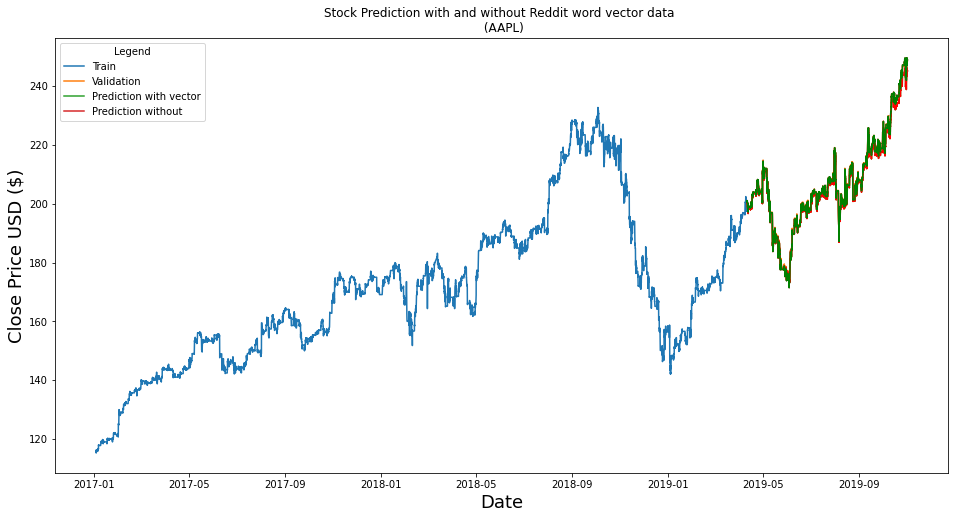

In [0]:
# Visualize data
plt.figure(figsize=(16,8))
plt.title('Stock Prediction with and without Reddit word vector data \n (AAPL)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(appleTest)
plt.plot(appleValid)
plt.plot(appleValid['Predictions'], color='red')
plt.plot(appleValid['Predictions2'], color='green')
# plt.plot(amazonTest)
# plt.plot(amazonValid)
# plt.plot(amazonValid['Predictions'], color='red')
# plt.plot(amazonValid['Predictions2'], color='green')
# plt.plot(boeTest)
# plt.plot(boeValid)
# plt.plot(boeValid['Predictions'], color='red')
# plt.plot(boeValid['Predictions2'], color='green')
# plt.plot(spyTest, label='Train')
# plt.plot(spyValid, label='Actual')
# plt.plot(spyValid['Predictions'], label='Prediction with vector', color='red')
# plt.plot(spyValid['Predictions2'], label='Prediction without vector', color='green')

# plt.plot(teslaTest, label='Train')
# plt.plot(teslaValid, label="Actual")
# plt.plot(teslaValid['Predictions'], label="vector prediction", color='red')
# plt.plot(teslaValid['Predictions2'], label="without vector prediction", color="green")
plt.legend(('Train', 'Validation', 'Prediction with vector', 'Prediction without'), title="Legend",)
plt.show()
